# ÍMPORTS

In [1]:
# BASIC IMPORTS
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss
import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
import joblib
from sklearn.pipeline import Pipeline


# MODELLING
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ( RandomForestRegressor, AdaBoostRegressor, RandomForestClassifier,
                                AdaBoostClassifier, GradientBoostingClassifier)
from sklearn.svm import SVR, SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# PREPROCESSING
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# MODEL SELECETION
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# METRICS
from sklearn.metrics import classification_report
from sklearn.metrics import ( r2_score, mean_absolute_error, mean_squared_error,
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, precision_score, recall_score, f1_score, log_loss,
    matthews_corrcoef, cohen_kappa_score, accuracy_score, roc_curve, auc, 
)


In [2]:
df = pd.read_csv(r'C:\Users\kabee\OneDrive\Desktop\DS PROJ 2\NOTEBOOK\DATA\Dataset.csv')
df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


# PREPROCESSING

In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [5]:
nan_values = df.isna().sum()
print("Columns with NaN values:")
print(nan_values[nan_values > 0])

Columns with NaN values:
Cuisines    9
dtype: int64


In [6]:
df['City'] = df['City'].replace({
    'Bras�_lia': 'Brazil',
    'S��o Paulo': 'Sao Paulo',
    '��stanbul': 'Istanbul'
})

In [7]:
most_frequent_cuisine = df['Cuisines'].mode()[0]
df['Cuisines'] = df['Cuisines'].fillna(most_frequent_cuisine)

In [8]:
nan_values = df.isna().sum()
print("Columns with NaN values:")
print(nan_values[nan_values > 0])

Columns with NaN values:
Series([], dtype: int64)


In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

if len(numerical_features)>len(categorical_features):
    categorical_features.extend([' '] * (len(numerical_features) - len(categorical_features)))
elif len(numerical_features)<len(categorical_features):
    numerical_features.extend([' '] * (len(categorical_features) - len(numerical_features)))


features = pd.DataFrame({
'Numerical': numerical_features,
'Categorical': categorical_features
})

features

,Numerical,Categorical
0,Restaurant ID,Restaurant Name
1,Country Code,City
2,Longitude,Address
3,Latitude,Locality
4,Average Cost for two,Locality Verbose
5,Price range,Cuisines
6,Aggregate rating,Currency
7,Votes,Has Table booking
8,,Has Online delivery
9,,Is delivering now


# ENCODING

In [10]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['City_Code'] = label_encoder.fit_transform(df['City'])
df['Cuisines_Code'] = label_encoder.fit_transform(df['Cuisines'])
df['Rating_Text_Code'] = label_encoder.fit_transform(df['Rating text'])

In [11]:
# Feature Selection
features = ['City_Code', 'Price range', 'Aggregate rating', 'Votes', 'Cuisines_Code']
target = 'Rating_Text_Code'

X = df[features]
y = df[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
warnings.filterwarnings("ignore")

- MODEL

In [14]:
Model_cls = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), 
    "CatBoost Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
}

In [15]:
results = []
best_model_name = None
best_model_obj = None
best_accuracy_score = -float('inf')

In [16]:
for model_name, clf in Model_cls.items():
    
    # Fitting the model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

    result = {
        "Model": model_name,
        "Accuracy": accuracy,          #ACURRACY
        "Precision": precision,        #PRECISION
        "Recall": recall,              #RECALL
        "F1 Score": f1,                #F1 SCORE
        "ROC-AUC": roc_auc,            #ROC-AUC
    }
    
    results.append(result)

    if accuracy > best_accuracy_score:
        best_accuracy_score = accuracy
        best_model_name = model_name
        best_model_obj = clf  

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print(f"BEST MODEL IS: {best_model_name}\n")
results_df


BEST MODEL IS: Decision Tree



,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
2,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
3,Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
4,XGBClassifier,1.000000,1.000000,1.000000,1.000000,1.000000
5,CatBoost Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
7,Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
0,Logistic Regression,0.838305,0.810002,0.838305,0.818788,0.952020
1,K-Neighbors Classifier,0.680272,0.657098,0.680272,0.665549,0.795324
6,AdaBoost Classifier,0.648875,0.462855,0.648875,0.527276,0.773985


Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       756
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00       429
           3       1.00      1.00      1.00       421
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00       212

    accuracy                           1.00      1911
   macro avg       1.00      1.00      1.00      1911
weighted avg       1.00      1.00      1.00      1911



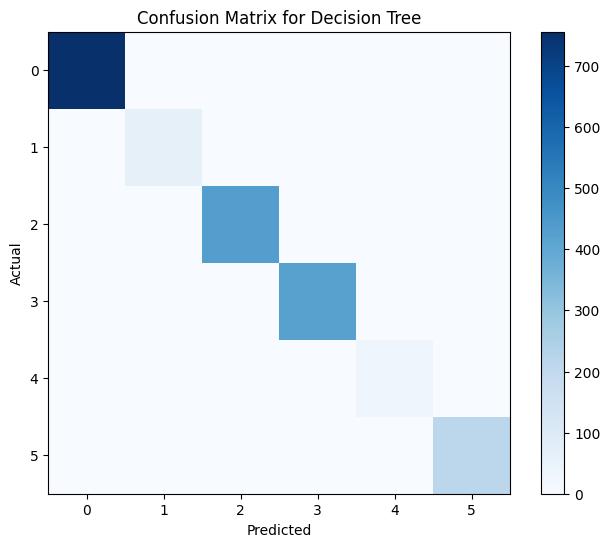

In [17]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)                           # Predictions on the testing set

# Evaluating model performance
print(f"Classification Report: {best_model_name}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
df['Cuisines'].nunique(), df['Cuisines'].unique()

(1825,
 array(['French, Japanese, Desserts', 'Japanese',
        'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
        'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
       dtype=object))

In [19]:
best_model_obj.fit(X_train, y_train)

y_pred = best_model_obj.predict(X_test)

cuisine_categories = df['Cuisines'].unique()

cuisine_names = []
precisions = []
recalls = []
f1_scores = []

# Calculating metrics per cuisine category
for cuisine in cuisine_categories:
    cuisine_indices = df[df['Cuisines'] == cuisine].index.intersection(X_test.index)
    
    if cuisine_indices.empty:
        continue
    
    cuisine_X_test = X_test.loc[cuisine_indices]
    cuisine_y_test = y_test.loc[cuisine_indices]
    cuisine_y_pred = y_pred[cuisine_indices]
    
    if cuisine_X_test.empty or cuisine_y_test.empty:
        continue
    
    precision = precision_score(cuisine_y_test, cuisine_y_pred, average='weighted', zero_division=0)
    recall = recall_score(cuisine_y_test, cuisine_y_pred, average='weighted')
    f1 = f1_score(cuisine_y_test, cuisine_y_pred, average='weighted')
    
    cuisine_names.append(cuisine)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

results_per_cuisine = pd.DataFrame({
    'Cuisine': cuisine_names,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

print("Performance Metrics per Cuisine Category:")
print(results_per_cuisine)

plt.figure(figsize=(12, 8))
sns.barplot(x='Cuisine', y='F1 Score', data=results_per_cuisine)
plt.xticks(rotation=90)
plt.title('F1 Score per Cuisine Category')
plt.xlabel('Cuisine Category')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()


IndexError: index 4335 is out of bounds for axis 0 with size 1911

In [20]:
index_to_check = 4335

try:
    row = df.loc[index_to_check]
    print(f"Index {index_to_check} exists in the DataFrame.")
except KeyError:
    print(f"Index {index_to_check} does not exist in the DataFrame.")

print(row)
.1

Index 4335 exists in the DataFrame.
Restaurant ID                                             307342
Restaurant Name                                           Tamura
Country Code                                                   1
City                                                   New Delhi
Address                 TDI Centre, 1st Floor, Jasola, New Delhi
Locality                                                  Jasola
Locality Verbose                               Jasola, New Delhi
Longitude                                              77.287463
Latitude                                               28.537472
Cuisines                                                Japanese
Average Cost for two                                        1500
Currency                                      Indian Rupees(Rs.)
Has Table booking                                            Yes
Has Online delivery                                           No
Is delivering now                                     

0.1

# --------------------------- END ------------------------- #